In [32]:
# Libraries
import os
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
from torchvision.transforms import transforms
from torch.utils.data import Dataset, DataLoader
from torchvision import models
from torch.utils.data import WeightedRandomSampler
from sklearn.model_selection import train_test_split
import cv2
from transform import CLACHE, SimpleWhiteBalancing, WhiteBalancing, WhiteBalancing2

In [33]:
print(np.arange(7))

[0 1 2 3 4 5 6 7 8]


## Data Processing

### Data Evaluation

In [22]:
# Data path
train_df_all = pd.read_csv('input/train.csv')
test_df = pd.read_csv('input/test.csv')
# sub = pd.read_csv('input/sample_submission.csv')
train_dir = 'input/train_images'
test_dir = 'input/test_images'
print('Total images for train {0}'.format(len(os.listdir(train_dir))))
# print('Total images for train {0}'.format(len(os.listdir(test_dir))))


Total images for train 196087


In [23]:
train_df_all.iloc[50:60]

,category_id,date_captured,file_name,frame_num,id,location,rights_holder,seq_id,seq_num_frames,width,height
50,11,2011-12-22 23:26:49,58ff0fe6-23d2-11e8-a6a3-ec086b02610b.jpg,2,58ff0fe6-23d2-11e8-a6a3-ec086b02610b,130,Justin Brown,6f0d3461-5567-11e8-86be-dca9047ef277,3,1024,747
51,0,2014-09-09 19:00:00,599290c6-23d2-11e8-a6a3-ec086b02610b.jpg,1,599290c6-23d2-11e8-a6a3-ec086b02610b,26,Erin Boydston,6f4d9ae6-5567-11e8-9e3b-dca9047ef277,1,1024,747
52,0,2013-09-29 09:00:00,599d7d66-23d2-11e8-a6a3-ec086b02610b.jpg,1,599d7d66-23d2-11e8-a6a3-ec086b02610b,23,Erin Boydston,6fde1a14-5567-11e8-86f5-dca9047ef277,1,1024,747
53,0,2013-10-04 13:52:07,598f78a4-23d2-11e8-a6a3-ec086b02610b.jpg,1,598f78a4-23d2-11e8-a6a3-ec086b02610b,26,Erin Boydston,6f21b7b5-5567-11e8-844d-dca9047ef277,1,1024,747
54,0,2014-05-09 13:23:40,5a1b13d4-23d2-11e8-a6a3-ec086b02610b.jpg,1,5a1b13d4-23d2-11e8-a6a3-ec086b02610b,26,Erin Boydston,6f3909d4-5567-11e8-aab8-dca9047ef277,1,1024,747
55,13,2012-02-12 22:20:38,5a2c8630-23d2-11e8-a6a3-ec086b02610b.jpg,1,5a2c8630-23d2-11e8-a6a3-ec086b02610b,46,Justin Brown,6f185319-5567-11e8-8d8c-dca9047ef277,3,1024,747
56,0,2013-12-24 22:00:00,59055eca-23d2-11e8-a6a3-ec086b02610b.jpg,1,59055eca-23d2-11e8-a6a3-ec086b02610b,96,Erin Boydston,6f93c368-5567-11e8-9dc4-dca9047ef277,1,1024,747
57,0,2014-07-10 04:00:00,59c1774b-23d2-11e8-a6a3-ec086b02610b.jpg,1,59c1774b-23d2-11e8-a6a3-ec086b02610b,57,Erin Boydston,6f8c7007-5567-11e8-85d2-dca9047ef277,1,1024,747
58,0,2013-08-03 13:31:10,5a1fe744-23d2-11e8-a6a3-ec086b02610b.jpg,5,5a1fe744-23d2-11e8-a6a3-ec086b02610b,56,Justin Brown,7010efc0-5567-11e8-8105-dca9047ef277,5,1024,747
59,0,2014-05-08 11:43:52,58d92fb3-23d2-11e8-a6a3-ec086b02610b.jpg,1,58d92fb3-23d2-11e8-a6a3-ec086b02610b,96,Erin Boydston,6fa205a6-5567-11e8-84b5-dca9047ef277,1,1024,747


In [24]:
test_df.iloc[50:60]

,date_captured,file_name,frame_num,id,location,rights_holder,seq_id,seq_num_frames,width,height
50,03-Jan-2016 15:20:00,bf25c980-2bf6-11e9-bcad-06f10d5896c4.jpg,1,bf25c980-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9ad223-2e32-11e9-9151-dca9047ef277,1,1024,726
51,03-Jan-2016 15:25:00,bf25c981-2bf6-11e9-bcad-06f10d5896c4.jpg,1,bf25c981-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9ad26b-2e32-11e9-9562-dca9047ef277,1,1024,726
52,03-Jan-2016 15:30:00,bf25c982-2bf6-11e9-bcad-06f10d5896c4.jpg,1,bf25c982-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9ad2b0-2e32-11e9-89e5-dca9047ef277,1,1024,726
53,03-Jan-2016 15:35:00,bf25c983-2bf6-11e9-bcad-06f10d5896c4.jpg,1,bf25c983-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9ad2f5-2e32-11e9-b742-dca9047ef277,1,1024,726
54,03-Jan-2016 15:40:00,bf25c984-2bf6-11e9-bcad-06f10d5896c4.jpg,1,bf25c984-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9ad33a-2e32-11e9-9bde-dca9047ef277,1,1024,726
55,03-Jan-2016 15:45:00,bf25c985-2bf6-11e9-bcad-06f10d5896c4.jpg,1,bf25c985-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9ad378-2e32-11e9-91d0-dca9047ef277,1,1024,726
56,03-Jan-2016 15:50:00,bf25c986-2bf6-11e9-bcad-06f10d5896c4.jpg,1,bf25c986-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9ad3bd-2e32-11e9-93e5-dca9047ef277,1,1024,726
57,03-Jan-2016 15:55:00,bf25c987-2bf6-11e9-bcad-06f10d5896c4.jpg,1,bf25c987-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9ad405-2e32-11e9-830b-dca9047ef277,1,1024,726
58,03-Jan-2016 16:00:00,bf25c988-2bf6-11e9-bcad-06f10d5896c4.jpg,1,bf25c988-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9ad440-2e32-11e9-a2d6-dca9047ef277,1,1024,726
59,03-Jan-2016 16:05:00,bf25c989-2bf6-11e9-bcad-06f10d5896c4.jpg,1,bf25c989-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9ad485-2e32-11e9-bbc6-dca9047ef277,1,1024,726


In [25]:
# code from https://www.kaggle.com/gpreda/iwildcam-2019-eda

classes_wild = {0: 'empty', 1: 'deer', 2: 'moose', 3: 'squirrel', 4: 'rodent', 5: 'small_mammal',
                6: 'elk', 7: 'pronghorn_antelope', 8: 'rabbit', 9: 'bighorn_sheep', 10: 'fox', 11: 'coyote',
                12: 'black_bear', 13: 'raccoon', 14: 'skunk', 15: 'wolf', 16: 'bobcat', 17: 'cat',
                18: 'dog', 19: 'opossum', 20: 'bison', 21: 'mountain_goat', 22: 'mountain_lion'}

train_df_all['classes_wild'] = train_df_all['category_id'].apply(lambda cw: classes_wild[cw])
train_df_all.iloc[50:60]

,category_id,date_captured,file_name,frame_num,id,location,rights_holder,seq_id,seq_num_frames,width,height,classes_wild
50,11,2011-12-22 23:26:49,58ff0fe6-23d2-11e8-a6a3-ec086b02610b.jpg,2,58ff0fe6-23d2-11e8-a6a3-ec086b02610b,130,Justin Brown,6f0d3461-5567-11e8-86be-dca9047ef277,3,1024,747,coyote
51,0,2014-09-09 19:00:00,599290c6-23d2-11e8-a6a3-ec086b02610b.jpg,1,599290c6-23d2-11e8-a6a3-ec086b02610b,26,Erin Boydston,6f4d9ae6-5567-11e8-9e3b-dca9047ef277,1,1024,747,empty
52,0,2013-09-29 09:00:00,599d7d66-23d2-11e8-a6a3-ec086b02610b.jpg,1,599d7d66-23d2-11e8-a6a3-ec086b02610b,23,Erin Boydston,6fde1a14-5567-11e8-86f5-dca9047ef277,1,1024,747,empty
53,0,2013-10-04 13:52:07,598f78a4-23d2-11e8-a6a3-ec086b02610b.jpg,1,598f78a4-23d2-11e8-a6a3-ec086b02610b,26,Erin Boydston,6f21b7b5-5567-11e8-844d-dca9047ef277,1,1024,747,empty
54,0,2014-05-09 13:23:40,5a1b13d4-23d2-11e8-a6a3-ec086b02610b.jpg,1,5a1b13d4-23d2-11e8-a6a3-ec086b02610b,26,Erin Boydston,6f3909d4-5567-11e8-aab8-dca9047ef277,1,1024,747,empty
55,13,2012-02-12 22:20:38,5a2c8630-23d2-11e8-a6a3-ec086b02610b.jpg,1,5a2c8630-23d2-11e8-a6a3-ec086b02610b,46,Justin Brown,6f185319-5567-11e8-8d8c-dca9047ef277,3,1024,747,raccoon
56,0,2013-12-24 22:00:00,59055eca-23d2-11e8-a6a3-ec086b02610b.jpg,1,59055eca-23d2-11e8-a6a3-ec086b02610b,96,Erin Boydston,6f93c368-5567-11e8-9dc4-dca9047ef277,1,1024,747,empty
57,0,2014-07-10 04:00:00,59c1774b-23d2-11e8-a6a3-ec086b02610b.jpg,1,59c1774b-23d2-11e8-a6a3-ec086b02610b,57,Erin Boydston,6f8c7007-5567-11e8-85d2-dca9047ef277,1,1024,747,empty
58,0,2013-08-03 13:31:10,5a1fe744-23d2-11e8-a6a3-ec086b02610b.jpg,5,5a1fe744-23d2-11e8-a6a3-ec086b02610b,56,Justin Brown,7010efc0-5567-11e8-8105-dca9047ef277,5,1024,747,empty
59,0,2014-05-08 11:43:52,58d92fb3-23d2-11e8-a6a3-ec086b02610b.jpg,1,58d92fb3-23d2-11e8-a6a3-ec086b02610b,96,Erin Boydston,6fa205a6-5567-11e8-84b5-dca9047ef277,1,1024,747,empty


empty            131457
opossum           14106
raccoon            8623
coyote             7209
rabbit             6938
deer               6102
bobcat             5975
cat                4759
squirrel           3398
dog                3035
rodent             2210
skunk              1361
fox                1093
mountain_lion        33
Name: classes_wild, dtype: int64


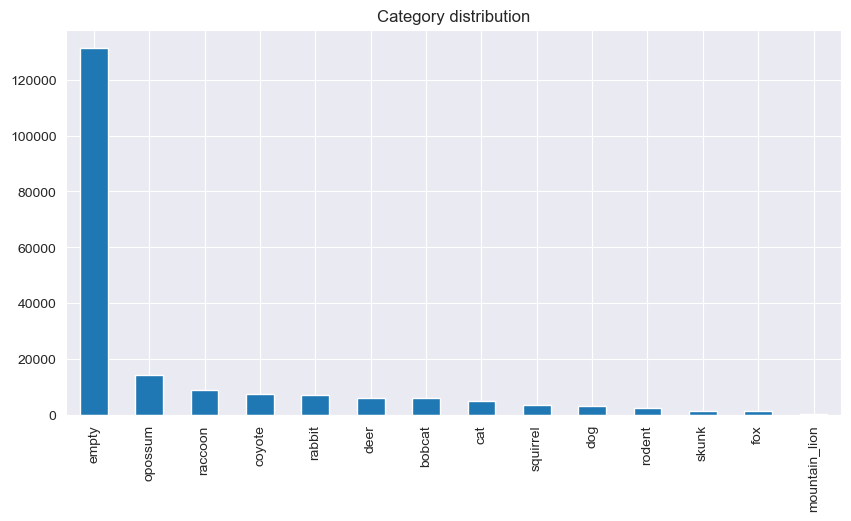

Only 14 classes are presented in the train set


In [26]:
# Category distribution
class_hist = train_df_all['classes_wild'].value_counts()
print(class_hist)
plt.figure(figsize=(10,5))
class_hist.plot(kind='bar',  title="Category distribution",)
plt.show()
print(f"Only {len(class_hist)} classes are presented in the train set")

As seen in the histogram we are witnessing here for a very imbalanced data, as the 'empty' class is far bigger than all other classes combined.
Furthermore, even when ignoring the 'empty' class, the data is still very imbalanced between the classes And some classes are not even train set at all, i.e. only 14 out of 23 classes are presented in the train set.

### Reduce Class Indices

In [27]:
CLASSES_TO_USE = train_df_all['category_id'].unique()
NUM_CLASSES = len(CLASSES_TO_USE)
CLASSMAP = dict([(i, j) for i, j in zip(CLASSES_TO_USE, range(NUM_CLASSES))])
REVERSE_CLASSMAP = dict([(v, k) for k, v in CLASSMAP.items()])
print(CLASSMAP)
# define new id
train_df_all['category_new_id']=train_df_all['category_id'].map(CLASSMAP)
train_df = train_df_all[['file_name','category_new_id']]

{19: 0, 0: 1, 3: 2, 8: 3, 4: 4, 13: 5, 1: 6, 11: 7, 16: 8, 17: 9, 14: 10, 18: 11, 10: 12, 22: 13}


### Data Loading

In [28]:
train_df

,file_name,category_new_id
0,5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg,0
1,588a679f-23d2-11e8-a6a3-ec086b02610b.jpg,0
2,59279ce3-23d2-11e8-a6a3-ec086b02610b.jpg,1
3,5a2af4ab-23d2-11e8-a6a3-ec086b02610b.jpg,1
4,599fbd89-23d2-11e8-a6a3-ec086b02610b.jpg,1
...,...,...
196294,597b495c-23d2-11e8-a6a3-ec086b02610b.jpg,1
196295,594e7621-23d2-11e8-a6a3-ec086b02610b.jpg,1
196296,596d6468-23d2-11e8-a6a3-ec086b02610b.jpg,4
196297,58f5b062-23d2-11e8-a6a3-ec086b02610b.jpg,1


In [35]:
# Custom data generator
class WildDataset(Dataset):
    def __init__(self, df, img_dir, augs=None):
        self.df = df
        self.img_dir = img_dir
        self.augs = augs
        self.sampler = self.make_sampler()

    def make_sampler(self):
        y_train = self.df['category_new_id']
        class_sample_count = np.array([len(np.where(y_train == t)[0]) for t in np.unique(y_train)])
        weight = len(np.unique(y_train)) / class_sample_count
        sample_weights = np.array([weight[t] for t in y_train])
        sample_weights = torch.from_numpy(sample_weights)
        return WeightedRandomSampler(weights=sample_weights, num_samples = len(self.df), replacement=True)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir,
                               self.df.iloc[idx, 0])
        image = cv2.imread(img_name)
        label = self.df.iloc[idx, 1]
        if self.augs is not None:
            image = self.augs(image)
        return image, label

train, val = train_test_split(train_df, stratify=train_df.category_new_id, test_size=0.1)

aug = transforms.Compose([transforms.ToPILImage(),
                          # transforms.Resize((32, 32)),
                          # CLACHE(),
                          # SimpleWhiteBalancing(),
                          transforms.ToTensor(),
                          # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                             ])

# iWildCam dataset
train_set = WildDataset(df=train,
                            img_dir=train_dir,
                            augs=aug)

valid_set = WildDataset(df=val,
                           img_dir=train_dir,
                           augs=aug)

# Data loader

train_loader = DataLoader(dataset=train_set, batch_size=24, sampler=train_set.sampler)
val_loader = DataLoader(dataset=valid_set, batch_size=24, shuffle=False, num_workers=1)


In [40]:
def show_aug(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(20,15))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    # plt.pause(0.001)  # pause a bit so that plots are updated

show_aug(train_set[544][0])

In [43]:
img=train_set[544][0].numpy()

TypeError: Can't convert object of type 'numpy.ndarray' to 'str' for 'filename'

In [ ]:
image = cv2.imread('input/train_images/5a0affae-23d2-11e8-a6a3-ec086b02610b.jpg')

# Window name in which image is displayed
window_name = 'image'

# Using cv2.imshow() method
# Displaying the image
cv2.imshow(window_name, image)